In [7]:
import torch
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath("..")) 

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
print(f'Using device: {device}')

from dataloader.dataloader import load_MNIST_data,load_CINIC10_data,load_CIFAR10_data,load_Fmnist_data
from train.training import train_nomal,train_for_DEQ
from train.evaluate import plot_loss_curve,plot_errorbar_losscurve,plot_confusion_matrix,plot_histograms,create_table,save_csv,convergence_verify,auto_git_push

Using device: cpu


1/5th Epoch:10/10(100.00%) 

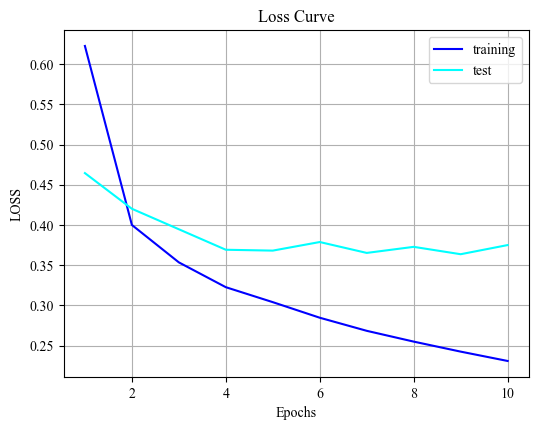

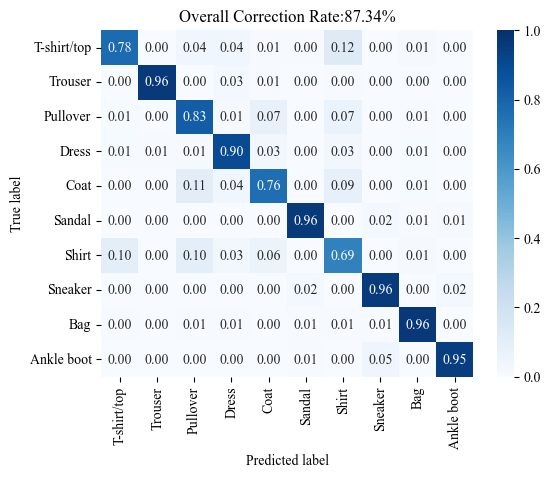

2/5th Epoch:10/10(100.00%) 

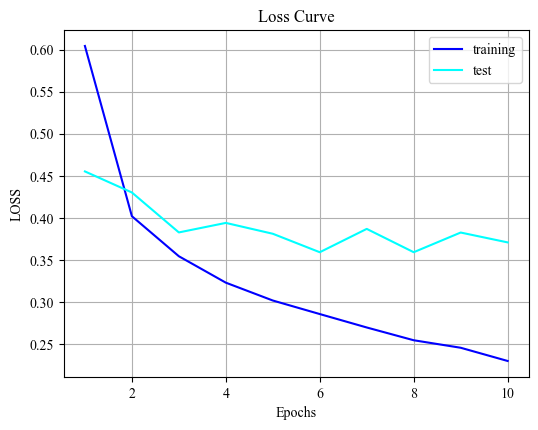

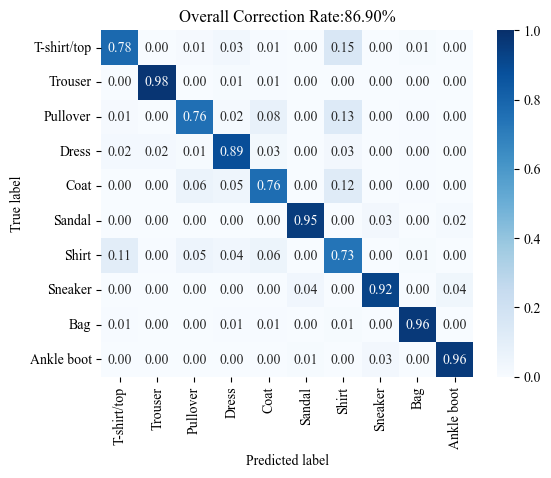

3/5th Epoch:10/10(100.00%) 

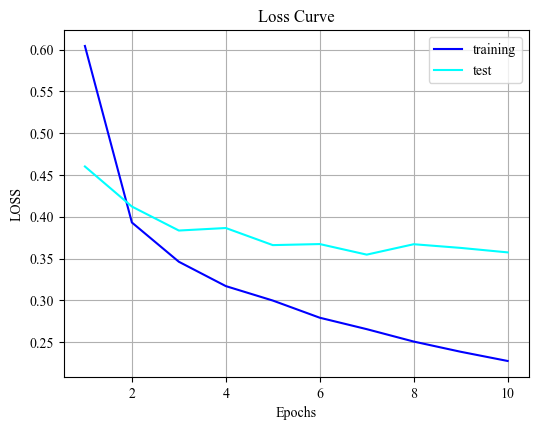

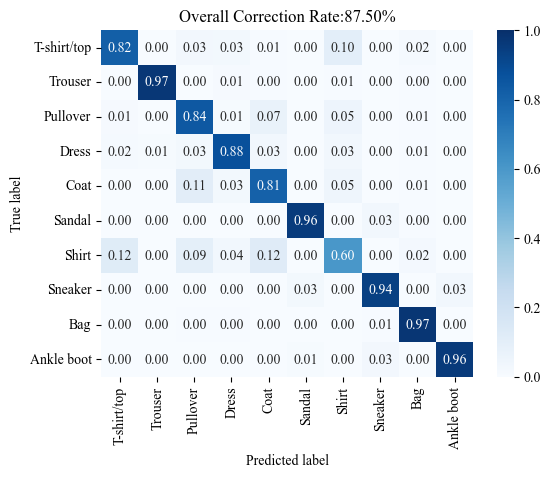

4/5th Epoch:10/10(100.00%) 

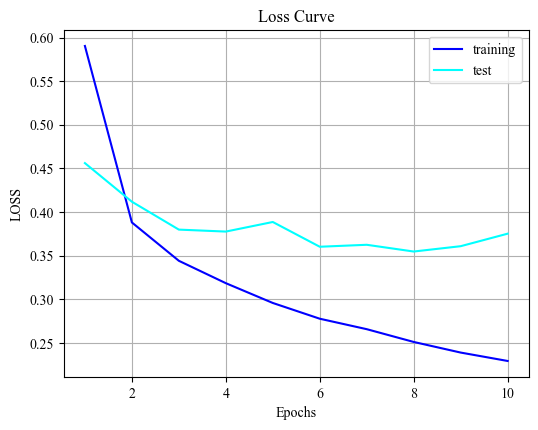

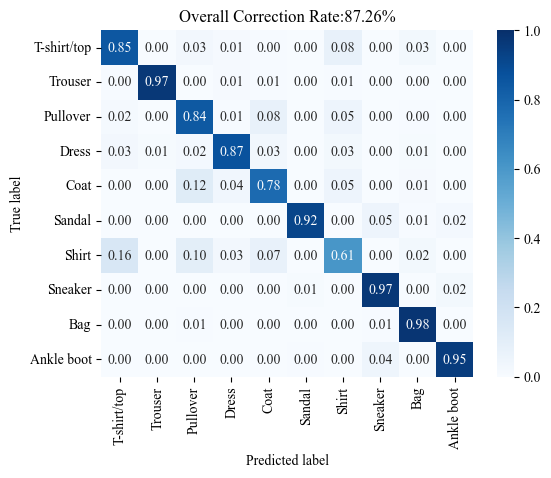

5/5th Epoch:10/10(100.00%) 

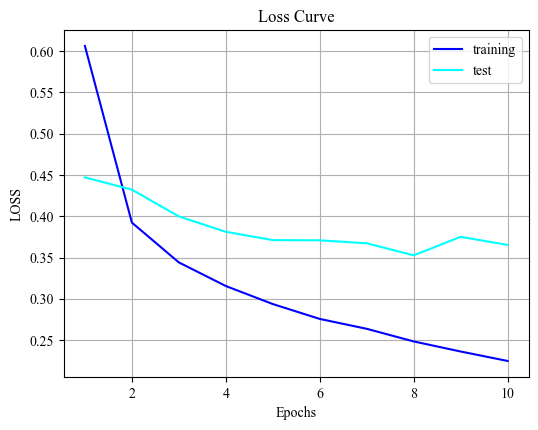

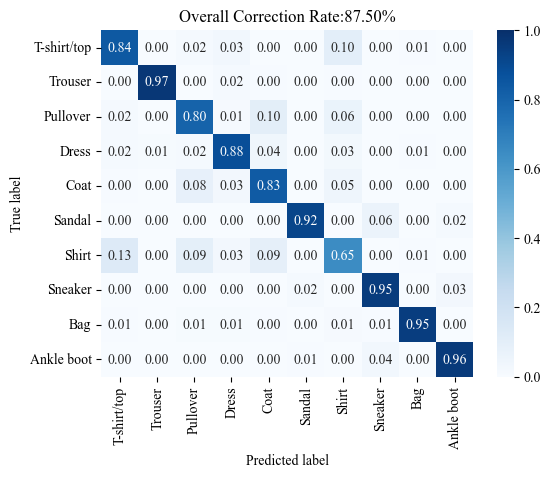

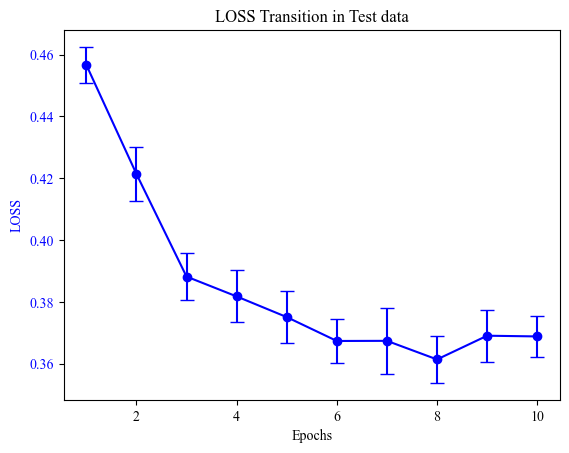

            Average  Best ID        Best  Worst ID       Worst
0   ACC   87.300000        3   87.500000         2   86.900000
1  LOSS    0.368817        3    0.357530         4    0.375262
2  TIME  178.860127        1  175.047536         3  184.384497
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist/PM_CNN_6191925.csv


In [13]:
#data---------------------------------------------
dataset = 'fashion-mnist' # 'mnist', 'cifar-10', 'cinic-10' , 'fashion-mnist'
batch_size = 100 #64 MNIST, 100 CIFAR10, 100 CINIC10
#Encoder_Model--------------------------------
enc_type = 'PM' # 'none', 'MZM', 'LI'
cls_type = 'CNN' # 'MLP' or 'CNN'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 5
max_epochs = 10
leverage = 1 #enc is not none
kernel_size =4
#save---------------------------------------------
folder = f'Class_{dataset}'
ex_name= f'{enc_type}_{cls_type}'

data_loaders = {
    'cifar-10': load_CIFAR10_data,
    'cinic-10': load_CINIC10_data,
    'mnist': load_MNIST_data,
    'fashion-mnist':load_Fmnist_data
}

data_train,data_test = data_loaders[dataset]()
if enc_type == 'none':
    leverage = 1

All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_nomal(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

    All_loss_test.append(loss_test_)
    All_pro_time.append(sum(pro_time_))
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)

1/5th Epoch:1/10(2.67%) 

----------------------Running with leverage: 1----------------------


1/5th Epoch:10/10(100.00%) 

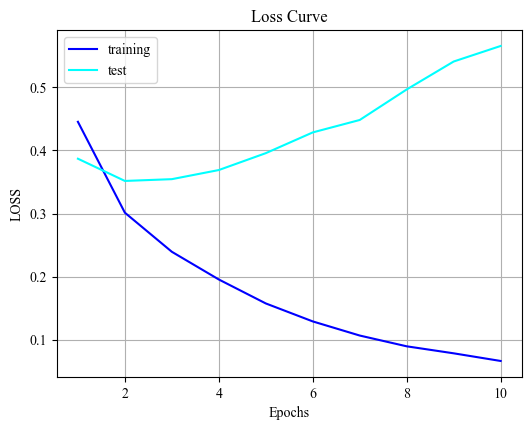

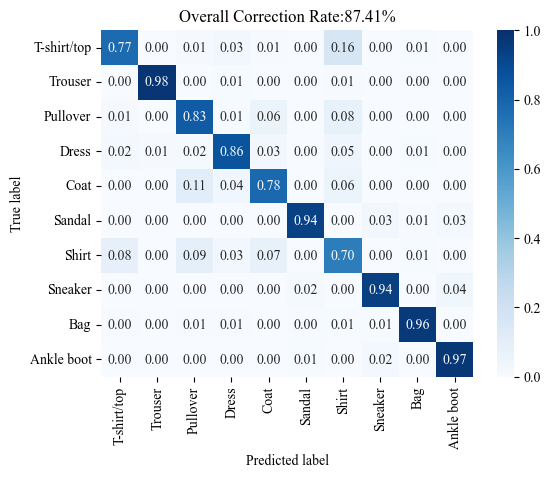

2/5th Epoch:10/10(100.00%) 

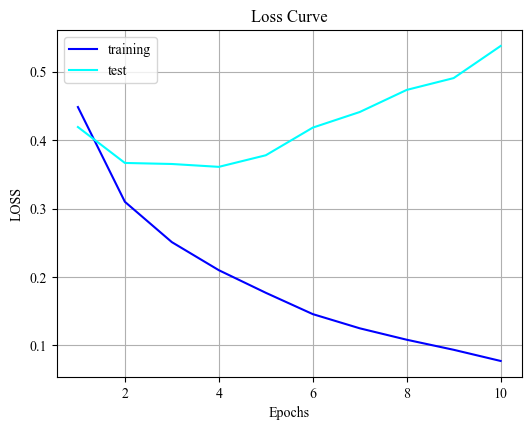

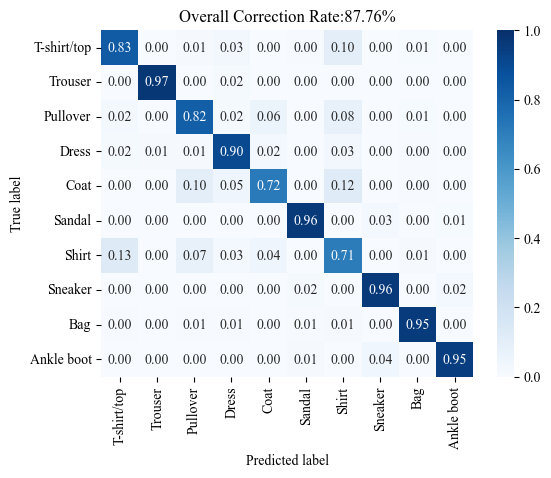

3/5th Epoch:10/10(100.00%) 

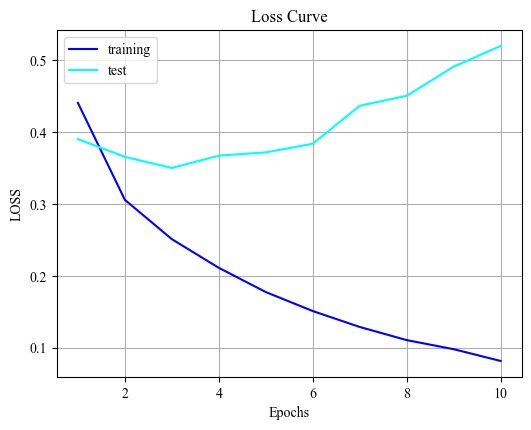

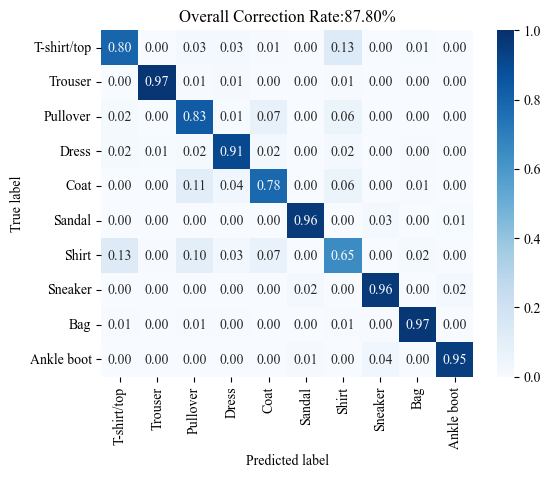

4/5th Epoch:10/10(100.00%) 

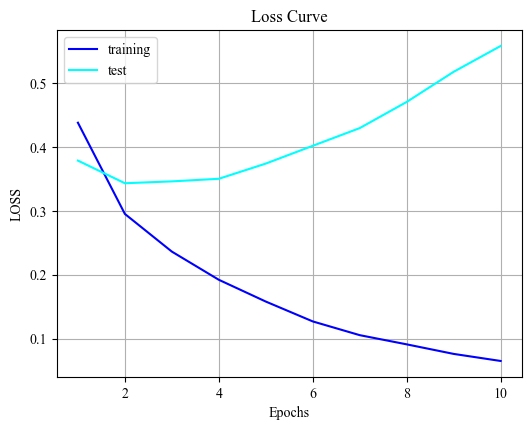

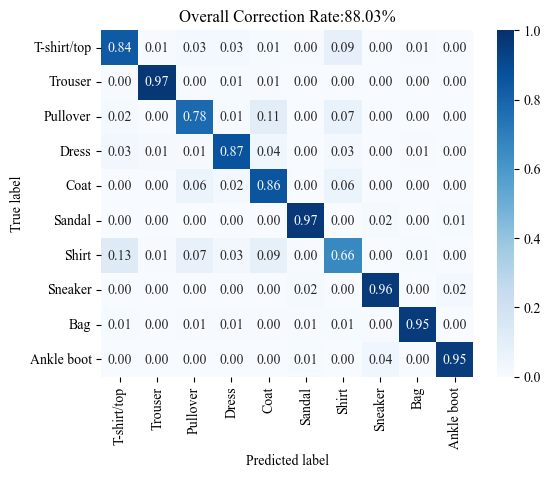

5/5th Epoch:10/10(100.00%) 

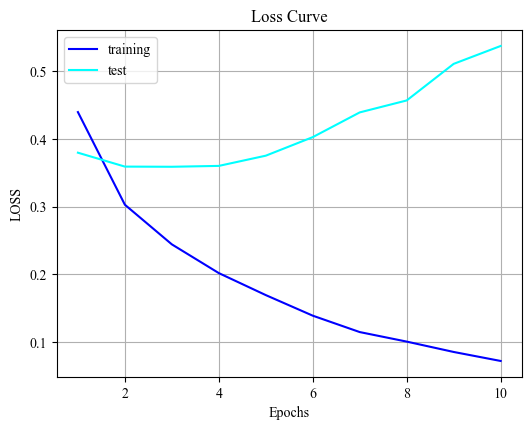

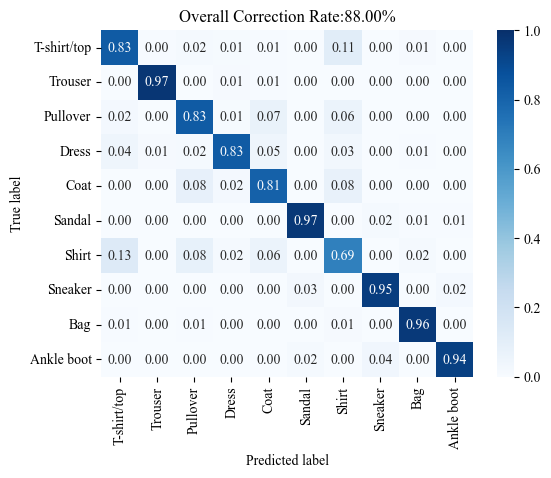

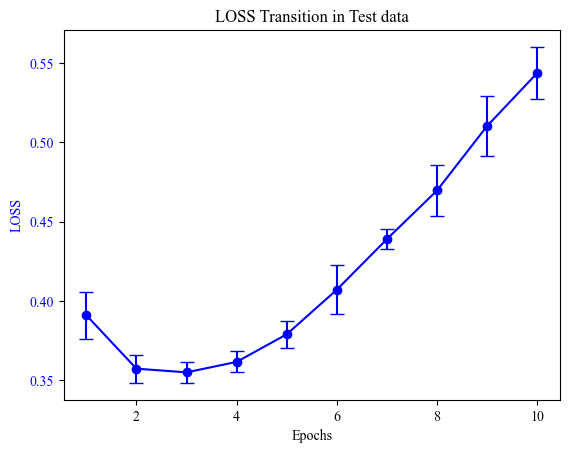

1/5th Epoch:1/10(2.50%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  87.800000        4  88.030000         1  87.410000
1  LOSS   0.543667        3   0.519685         1   0.565720
2  TIME  62.949363        1  59.380488         4  65.958551
----------------------Running with leverage: 2----------------------


1/5th Epoch:10/10(100.00%) 

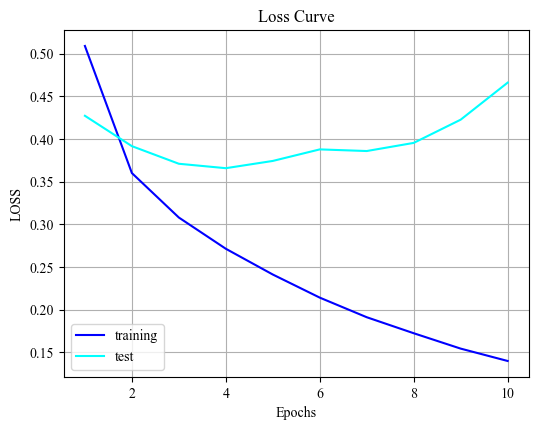

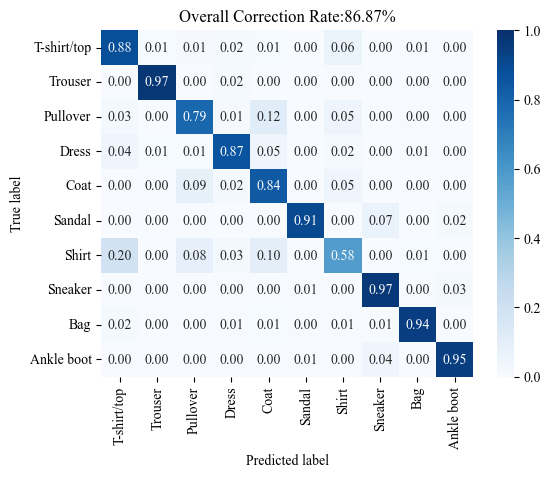

2/5th Epoch:10/10(100.00%) 

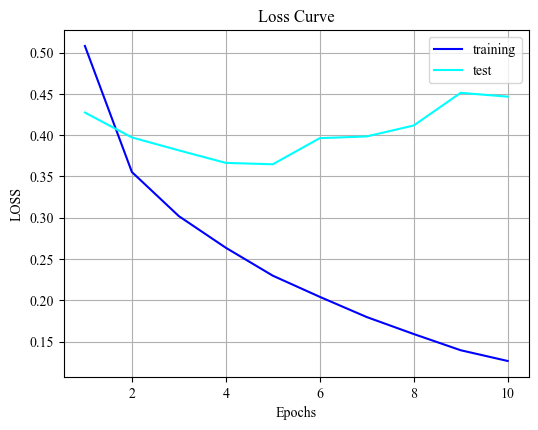

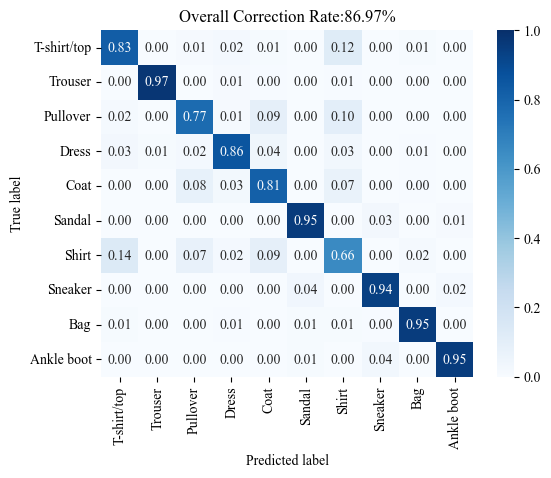

3/5th Epoch:10/10(100.00%) 

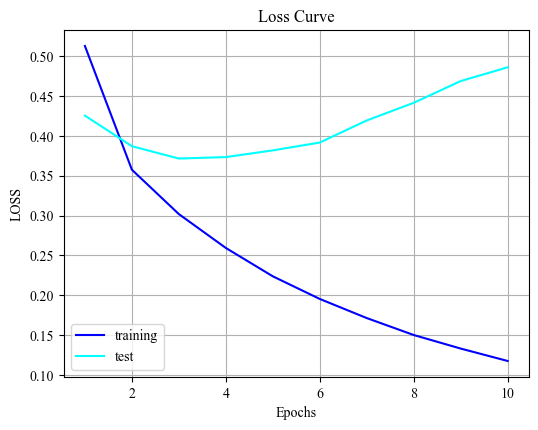

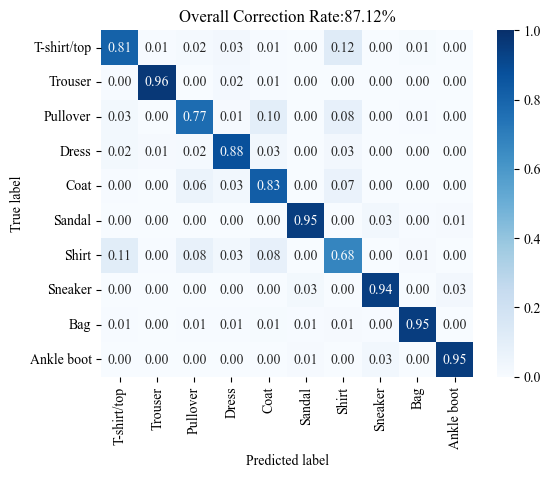

4/5th Epoch:10/10(100.00%) 

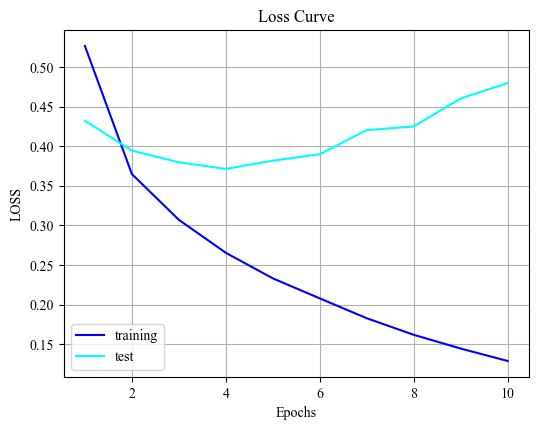

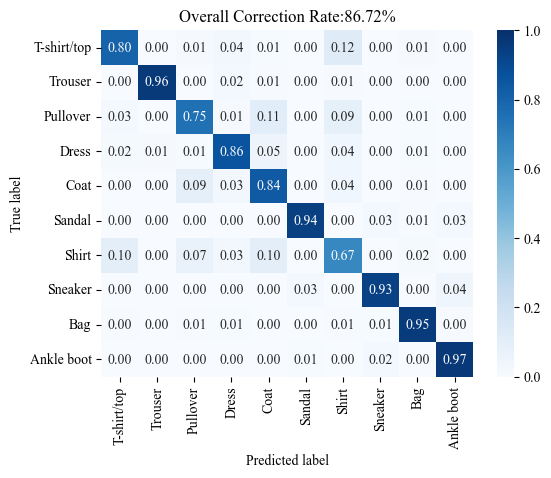

5/5th Epoch:10/10(100.00%) 

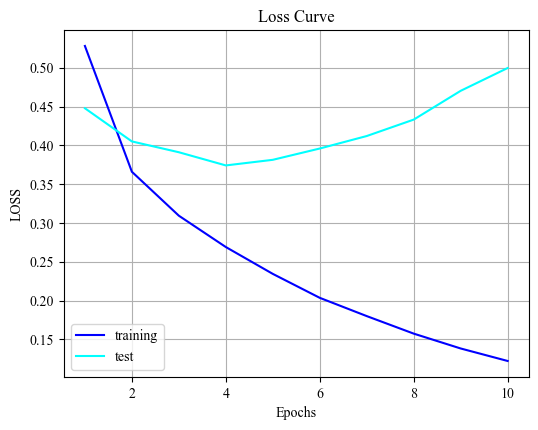

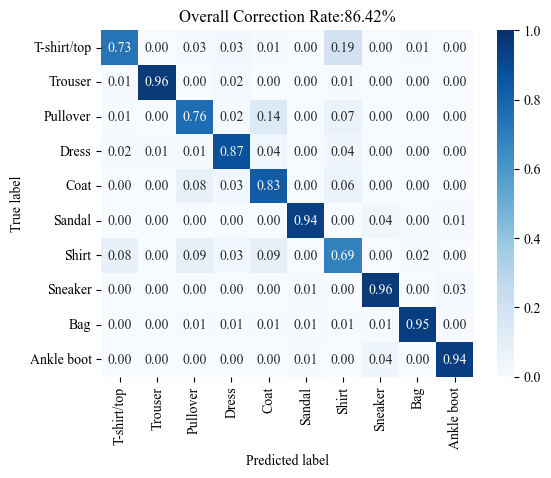

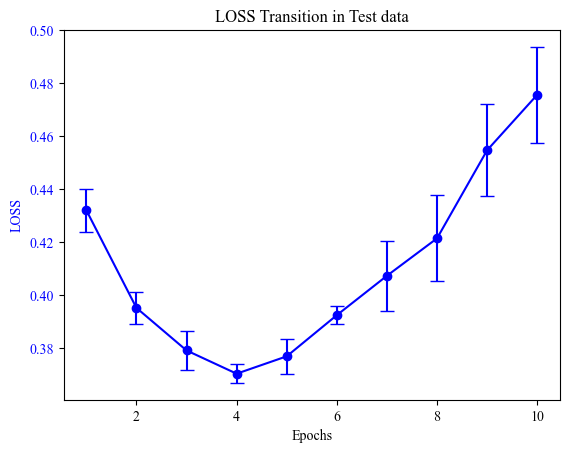

1/5th Epoch:1/10(2.50%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  86.820000        3  87.120000         5  86.420000
1  LOSS   0.475684        2   0.446721         5   0.499678
2  TIME  66.931973        2  63.748804         3  69.305524
----------------------Running with leverage: 4----------------------


1/5th Epoch:10/10(100.00%) 

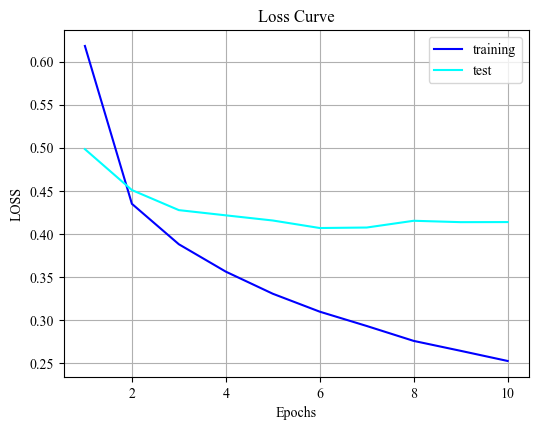

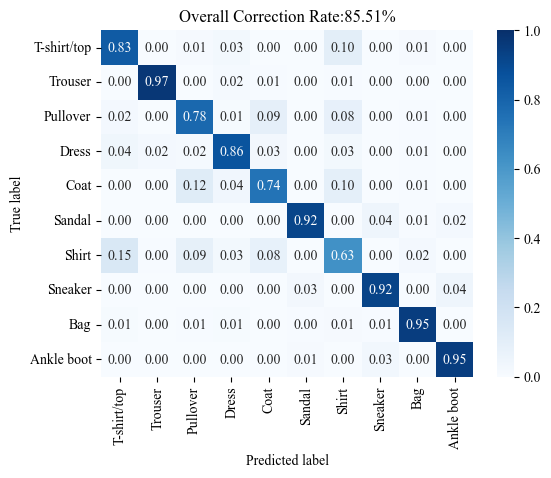

2/5th Epoch:10/10(100.00%) 

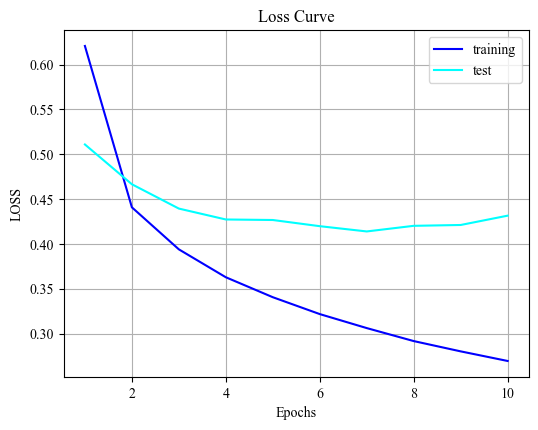

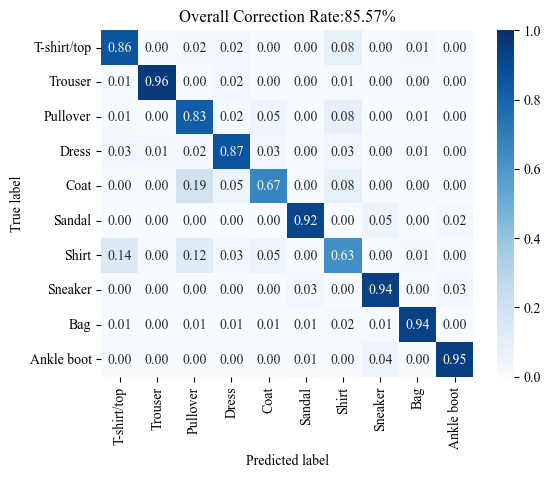

3/5th Epoch:10/10(100.00%) 

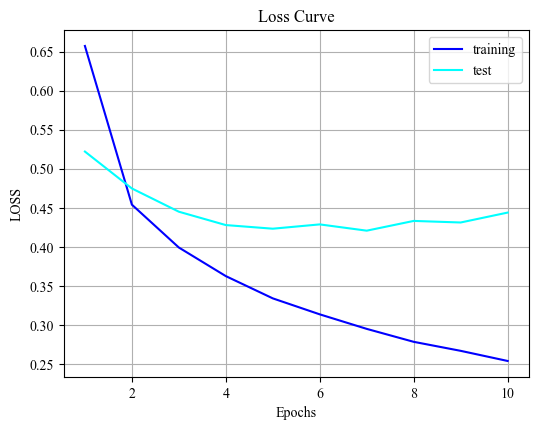

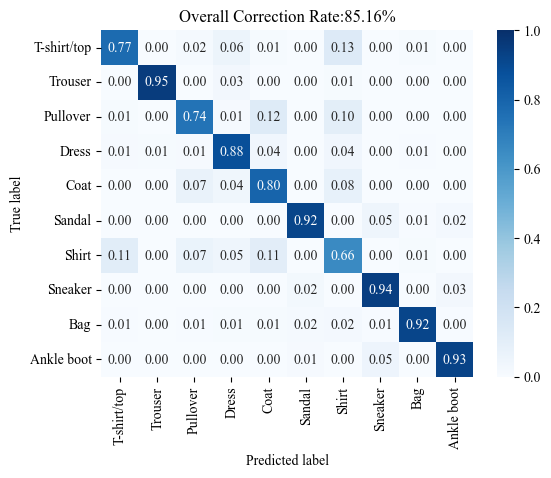

4/5th Epoch:10/10(100.00%) 

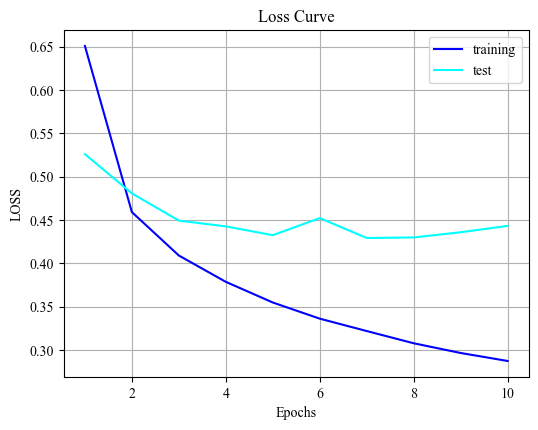

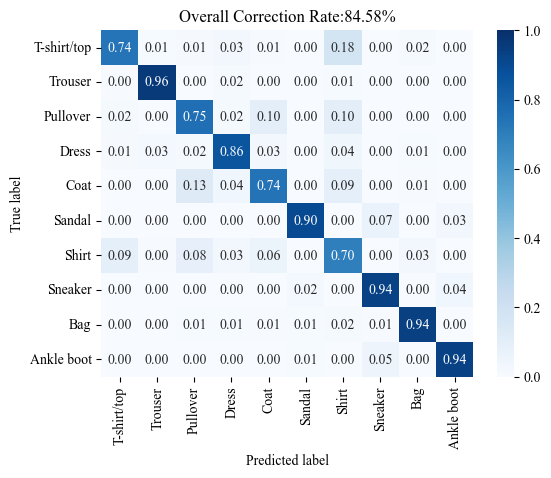

5/5th Epoch:10/10(100.00%) 

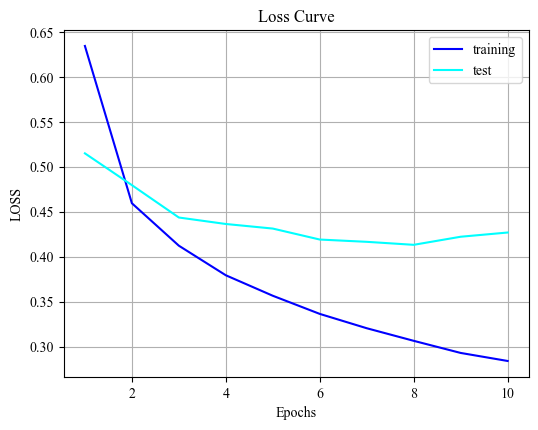

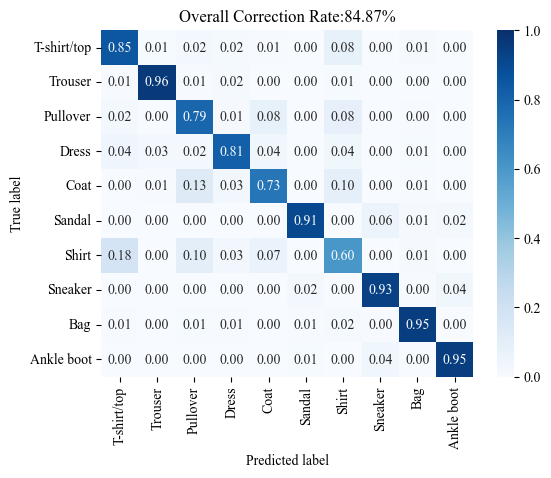

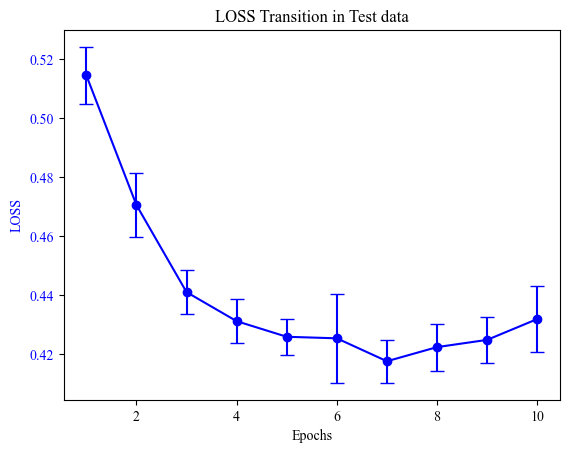

1/5th Epoch:1/10(2.17%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  85.138000        2  85.570000         4  84.580000
1  LOSS   0.431940        1   0.413862         3   0.444034
2  TIME  61.934342        4  57.974207         3  67.264967
----------------------Running with leverage: 8----------------------


1/5th Epoch:10/10(100.00%) 

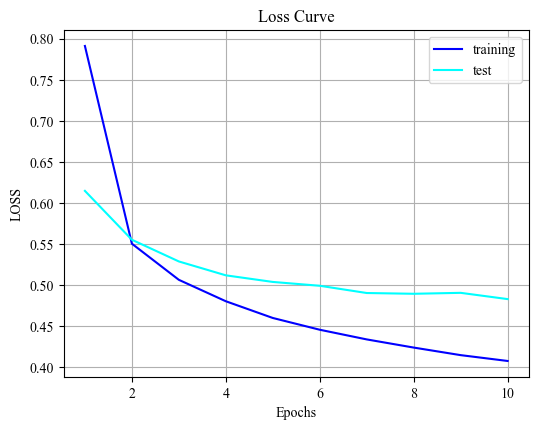

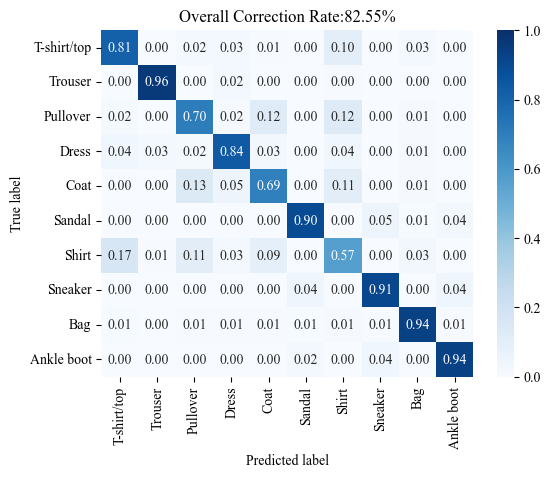

2/5th Epoch:10/10(100.00%) 

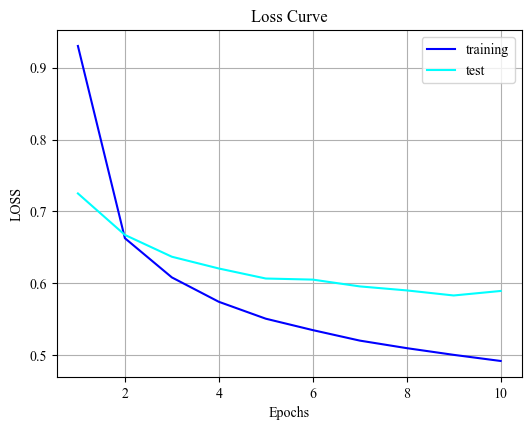

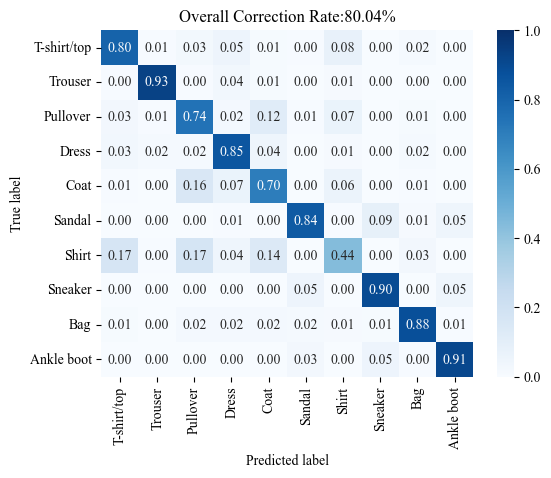

3/5th Epoch:10/10(100.00%) 

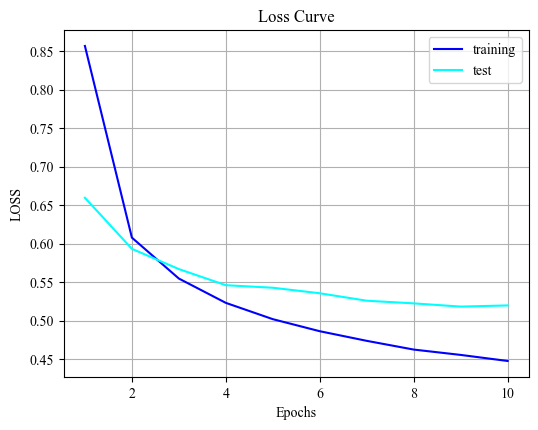

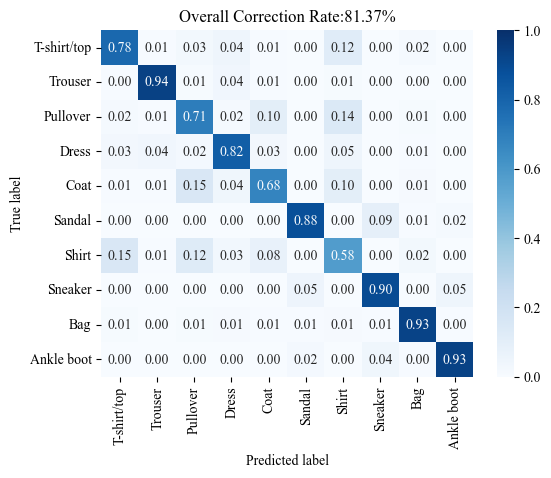

4/5th Epoch:10/10(100.00%) 

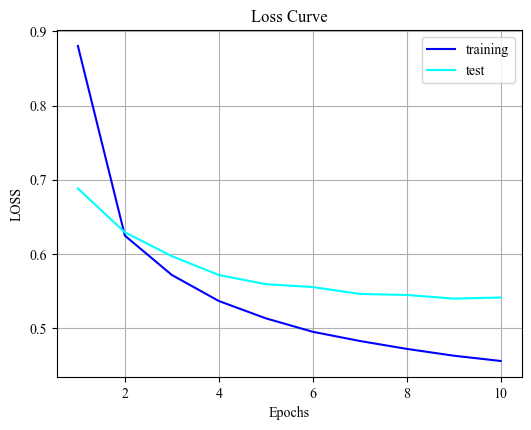

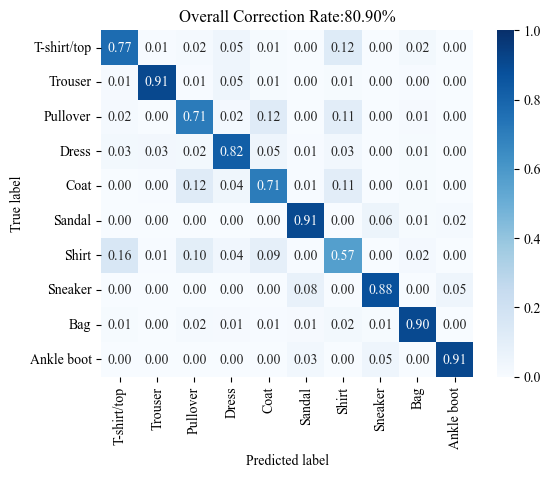

5/5th Epoch:10/10(100.00%) 

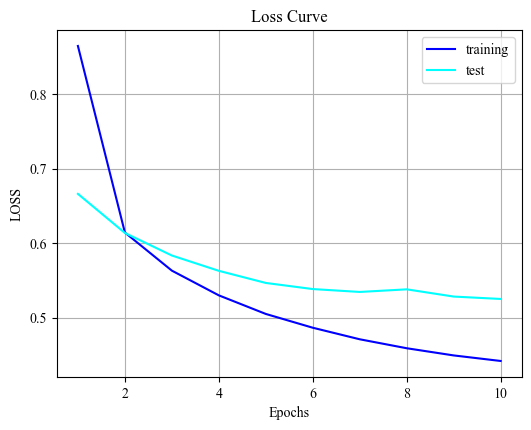

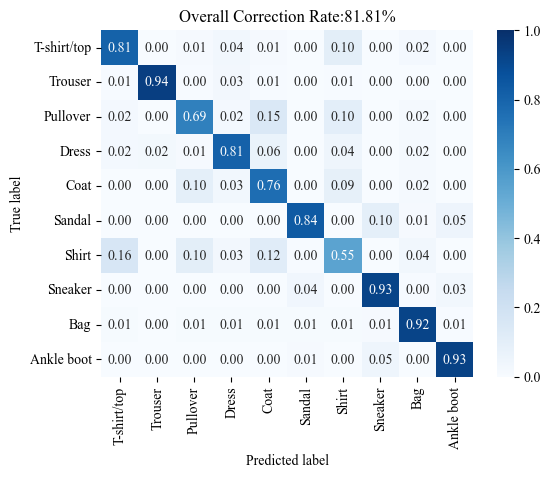

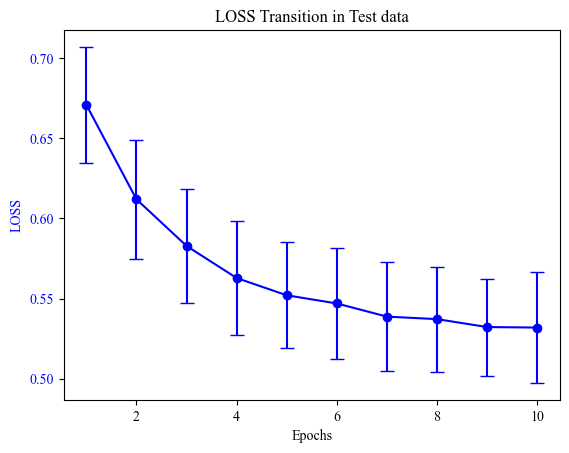

1/5th Epoch:1/10(0.83%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  81.334000        1  82.550000         2  80.040000
1  LOSS   0.531879        1   0.483221         2   0.589515
2  TIME  60.231970        5  56.821325         2  67.270591
----------------------Running with leverage: 16----------------------


1/5th Epoch:10/10(100.00%) 

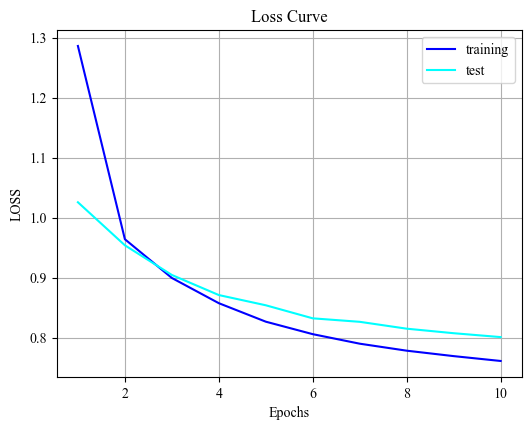

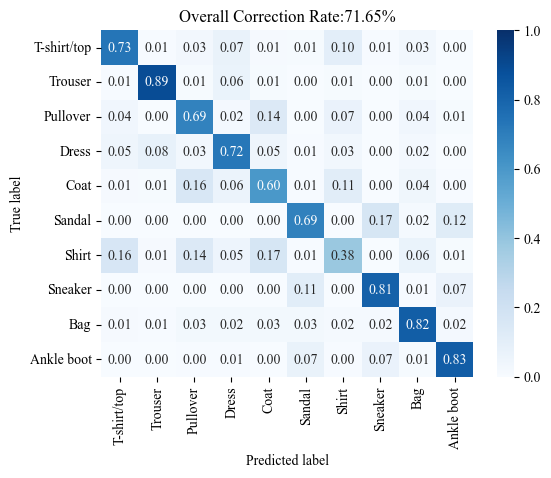

2/5th Epoch:10/10(100.00%) 

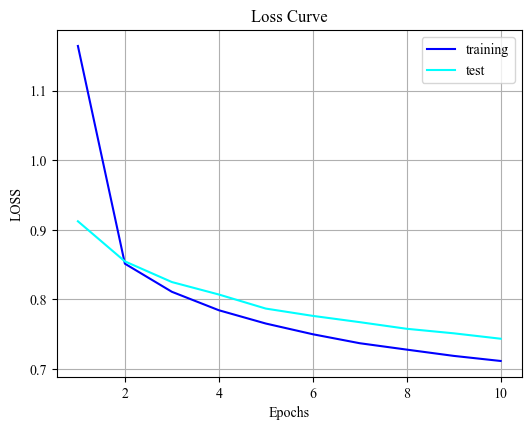

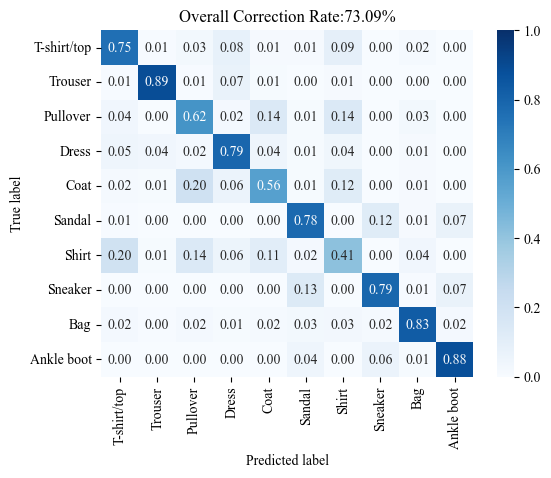

3/5th Epoch:10/10(100.00%) 

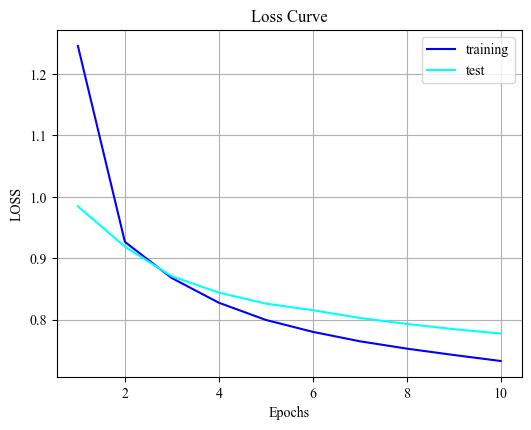

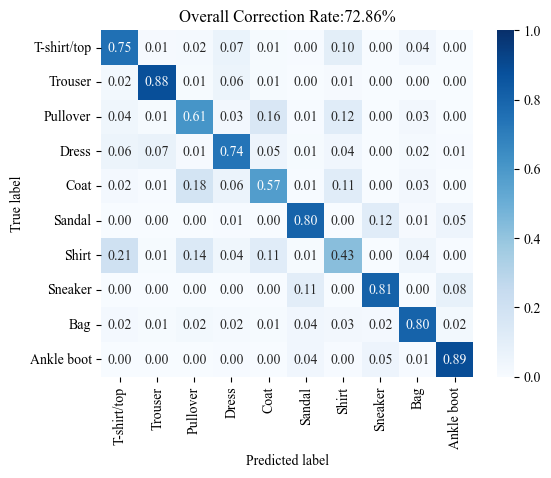

4/5th Epoch:10/10(100.00%) 

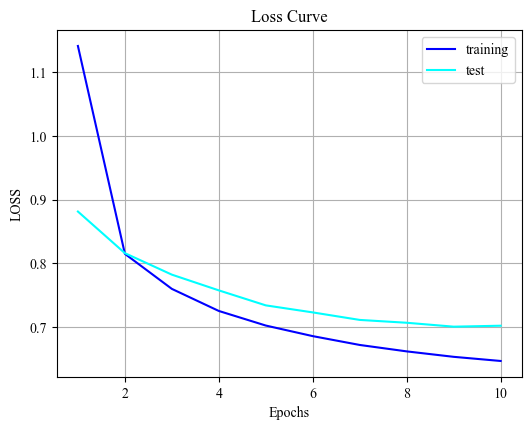

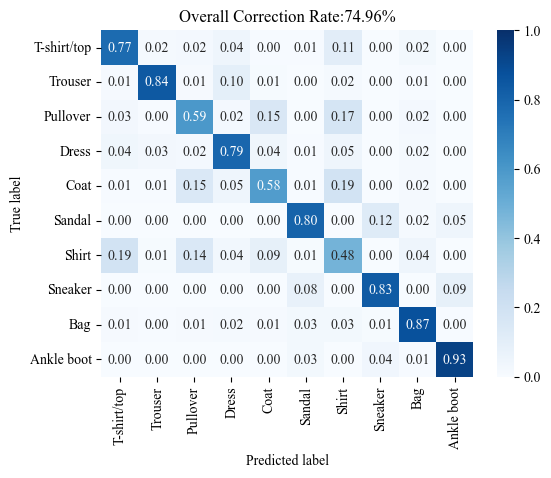

5/5th Epoch:10/10(100.00%) 

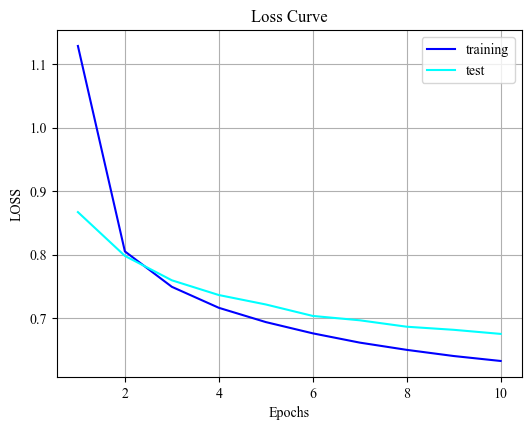

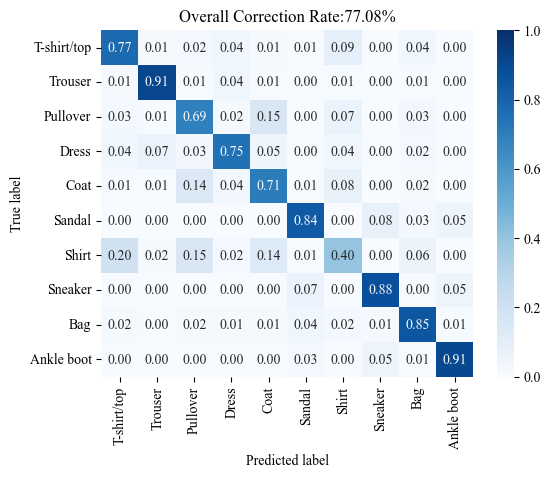

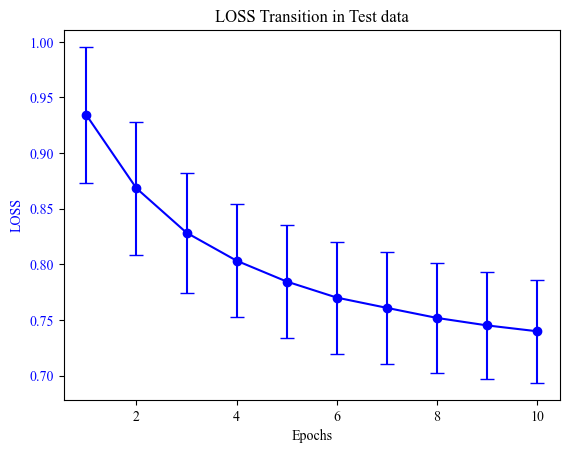

           Average  Best ID       Best  Worst ID      Worst
0   ACC  73.928000        5  77.080000         1  71.650000
1  LOSS   0.739923        5   0.675250         1   0.800864
2  TIME  61.033270        5  58.594447         2  64.945350
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist_VCR
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist_VCR/PM_MLP_6191925.csv


In [11]:

#data---------------------------------------------
dataset = 'fashion-mnist' # 'mnist', 'cifar-10', 'cinic-10' , 'fashion-mnist'
batch_size = 100 #64 MNIST, 100 CIFAR10, 100 CINIC10
#Encoder_Model--------------------------------
enc_type = 'PM' # 'none', 'MZM', 'LI'
cls_type = 'MLP' # 'MLP' or 'CNN'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 5
max_epochs = 10
leverages = [1,2,4,8,16] #enc is not none
kernel_size =4
#save---------------------------------------------
folder = f'Class_{dataset}_VCR'
ex_name= f'{enc_type}_{cls_type}'

data_loaders = {
    'cifar-10': load_CIFAR10_data,
    'cinic-10': load_CINIC10_data,
    'mnist': load_MNIST_data,
    'fashion-mnist':load_Fmnist_data
}

data_train,data_test = data_loaders[dataset]()
if enc_type == 'none':
    leverage = 1

results = []
All_last_LOSSs_ = []
All_last_ACCs_ = []
for leverage in leverages:
    print(f'----------------------Running with leverage: {leverage}----------------------')
    All_last_loss = []
    All_loss_test = []
    All_pro_time = []
    All_test_acc = []
    for num_times in range(num_try):

        loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_nomal(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

        All_loss_test.append(loss_test_)
        All_pro_time.append(sum(pro_time_))
        All_last_loss.append(Last_loss_test)
        All_test_acc.append(Test_acc)

        plot_loss_curve(loss_train_,loss_test_)
        plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

    plot_errorbar_losscurve(All_loss_test)
    create_table(All_test_acc,All_last_loss,All_pro_time)

    All_last_LOSSs_.append(All_last_loss)
    All_last_ACCs_.append(All_test_acc)

save_csv(folder,ex_name,All_last_LOSSs_,All_last_ACCs_)

1/5th Epoch:1/10(2.67%) 

----------------------Running with leverage: 1----------------------


1/5th Epoch:10/10(100.00%) 

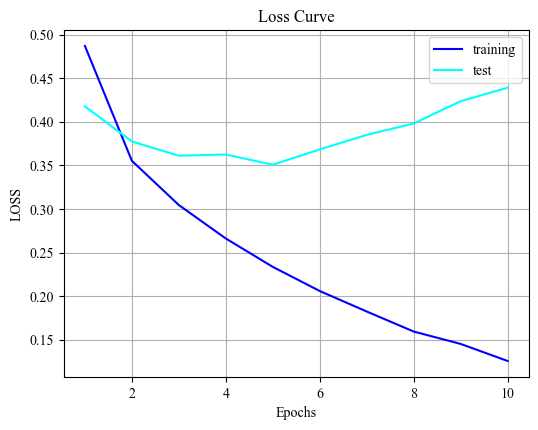

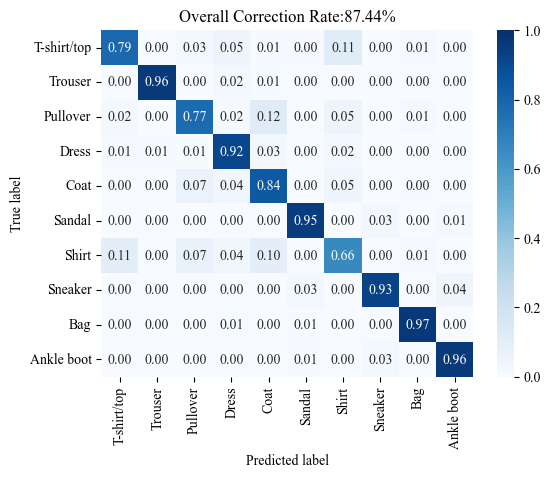

2/5th Epoch:10/10(100.00%) 

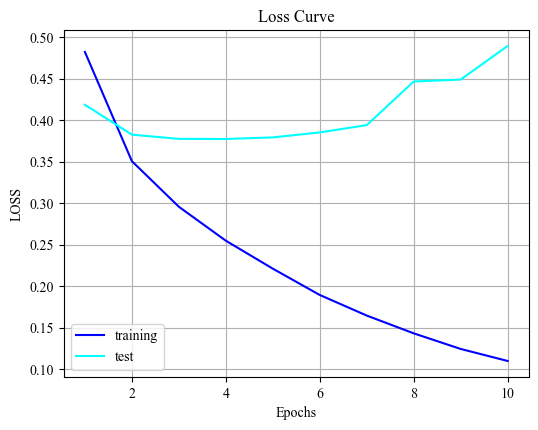

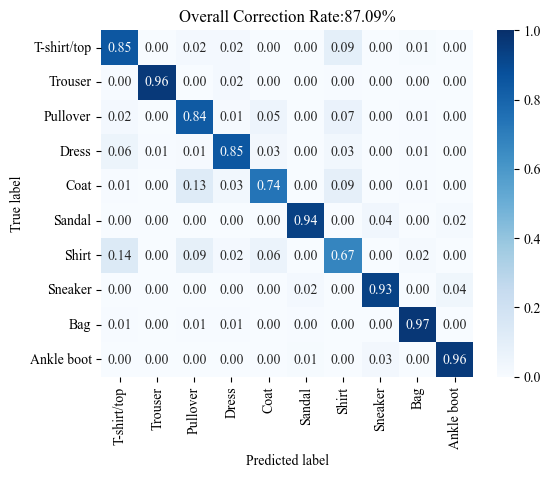

3/5th Epoch:10/10(100.00%) 

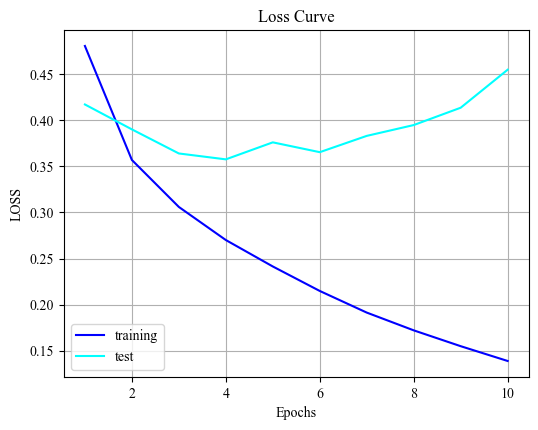

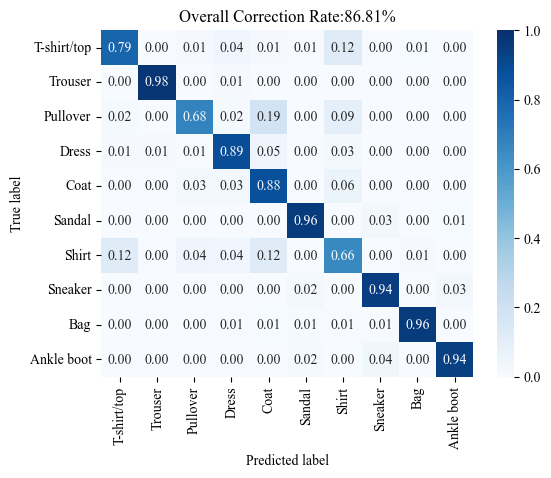

4/5th Epoch:10/10(100.00%) 

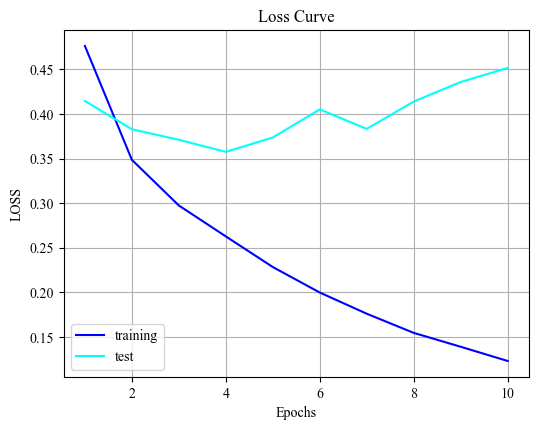

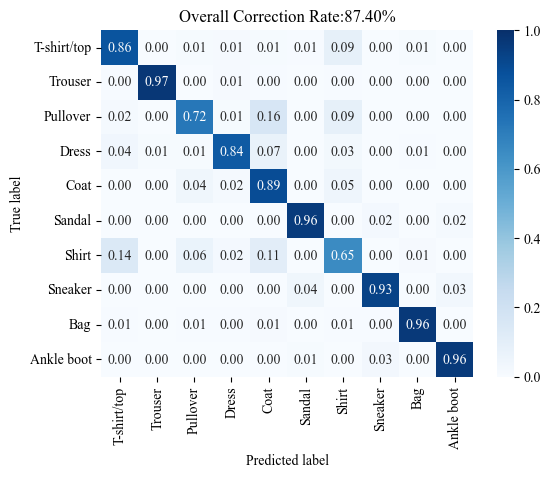

5/5th Epoch:10/10(100.00%) 

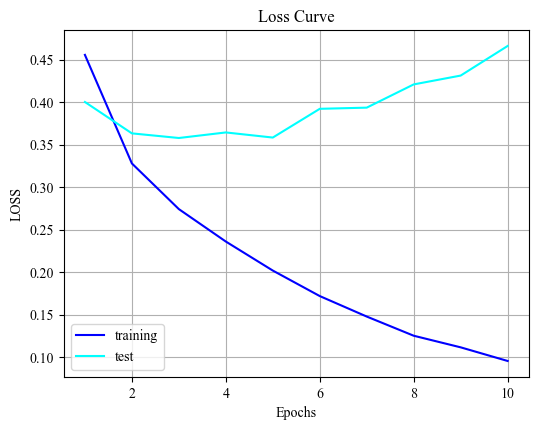

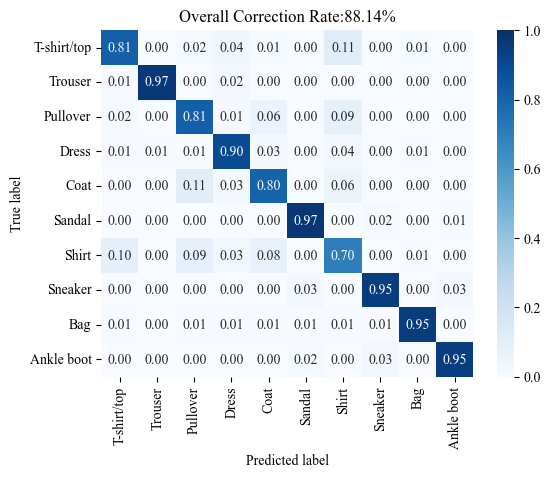

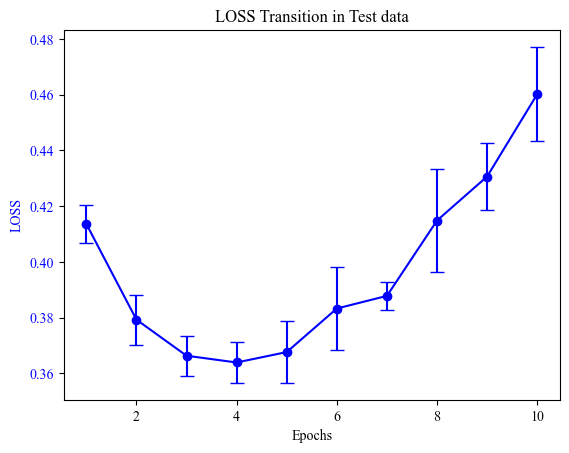

1/5th Epoch:1/10(1.67%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  87.376000        5  88.140000         3  86.810000
1  LOSS   0.460212        1   0.439157         2   0.489562
2  TIME  68.880922        1  65.306798         4  73.686281
----------------------Running with leverage: 2----------------------


1/5th Epoch:10/10(100.00%) 

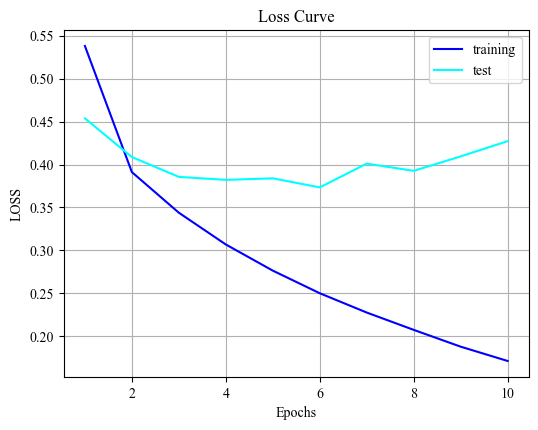

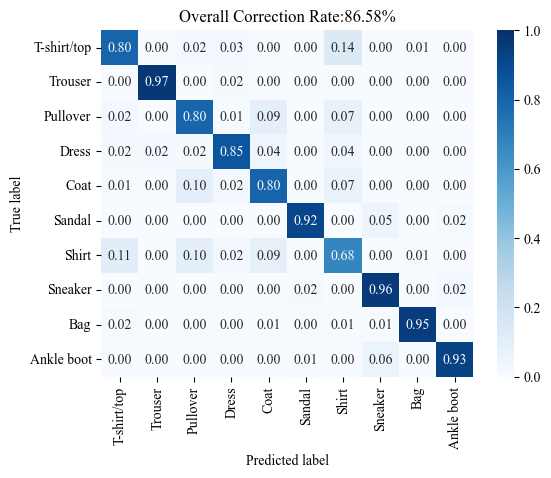

2/5th Epoch:10/10(100.00%) 

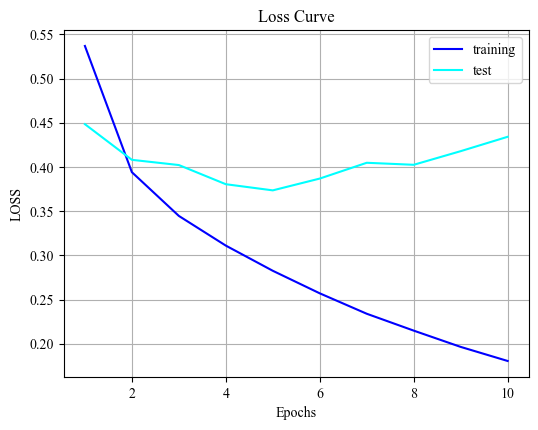

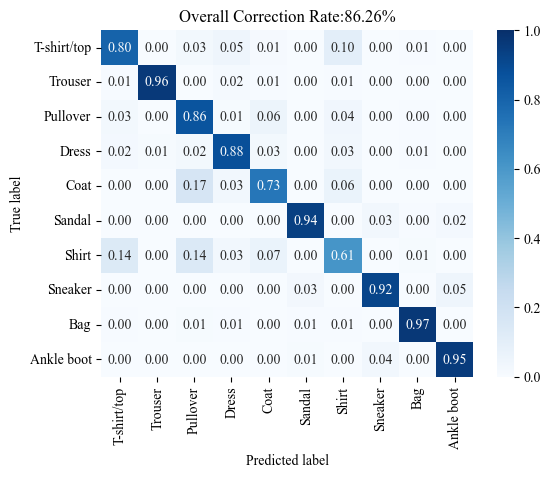

3/5th Epoch:10/10(100.00%) 

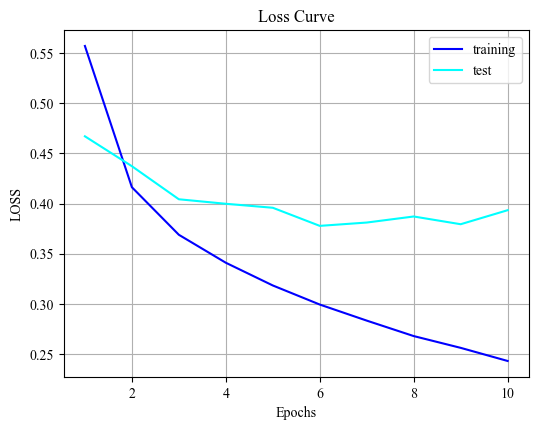

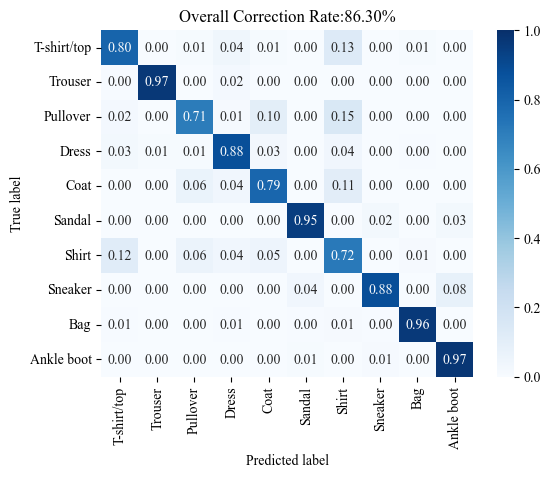

4/5th Epoch:10/10(100.00%) 

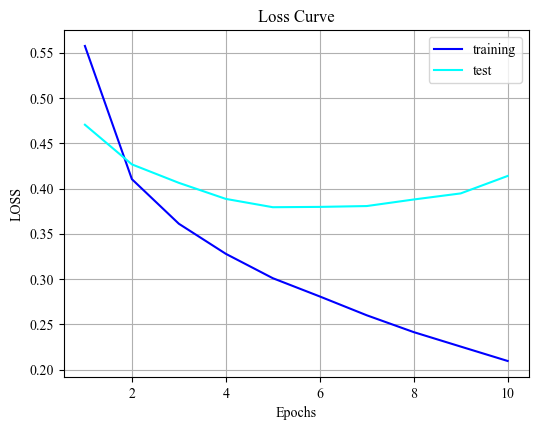

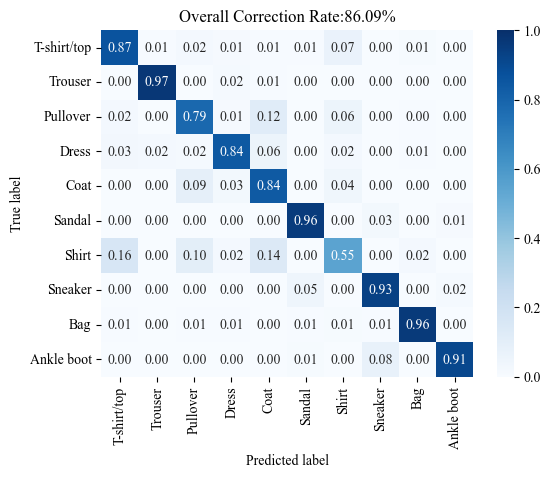

5/5th Epoch:10/10(100.00%) 

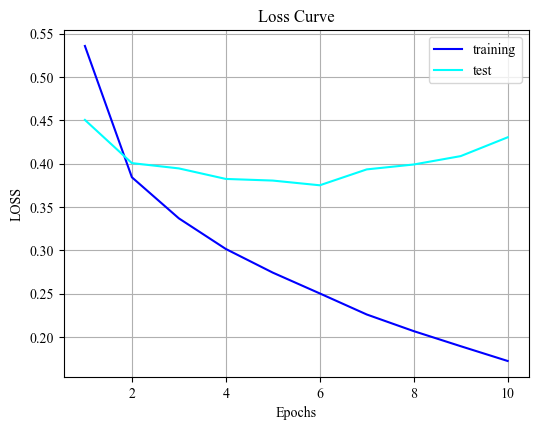

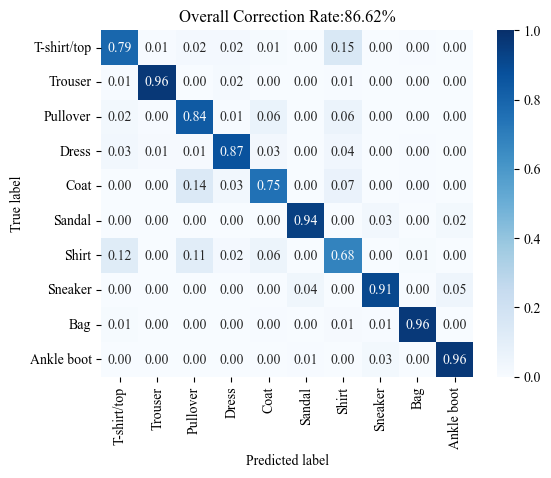

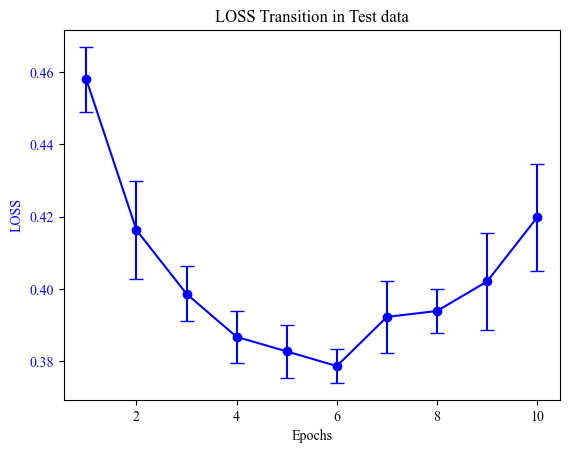

1/5th Epoch:1/10(2.33%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  86.370000        5  86.620000         4  86.090000
1  LOSS   0.419825        3   0.393477         2   0.434067
2  TIME  58.467878        3  55.036027         1  61.401343
----------------------Running with leverage: 4----------------------


1/5th Epoch:10/10(100.00%) 

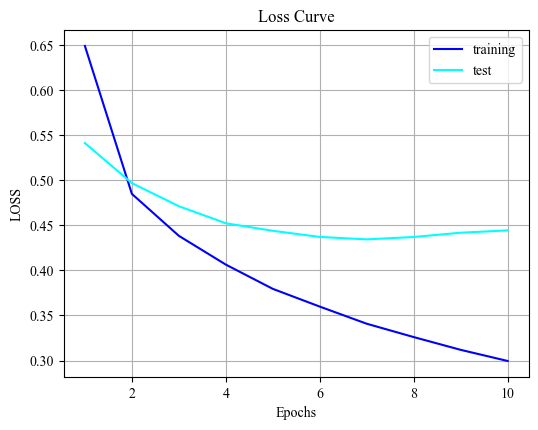

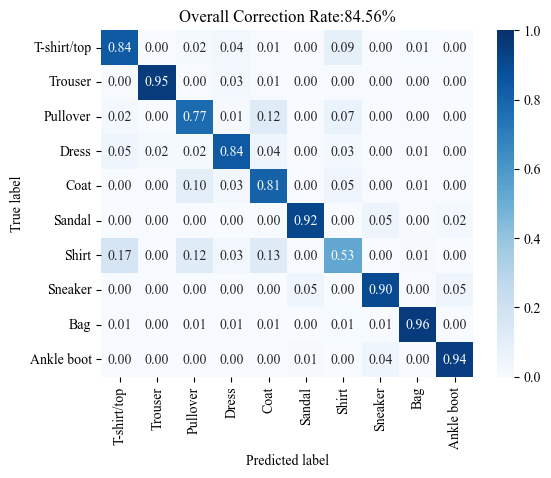

2/5th Epoch:10/10(100.00%) 

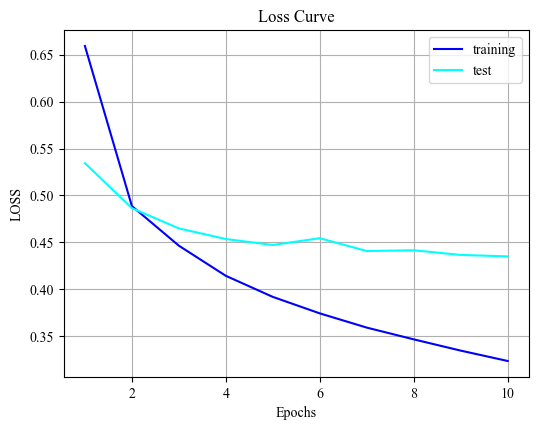

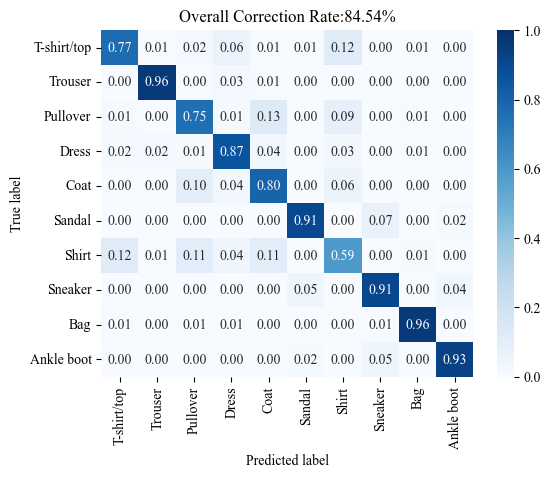

3/5th Epoch:10/10(100.00%) 

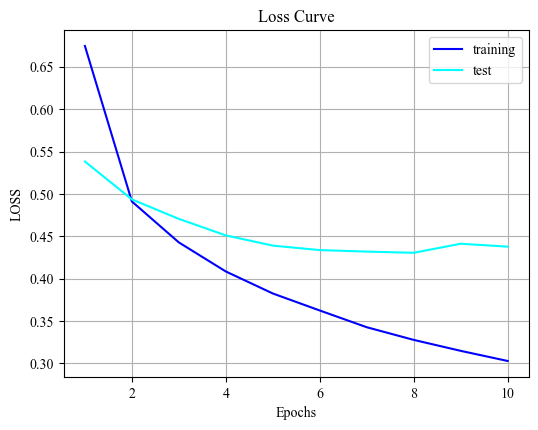

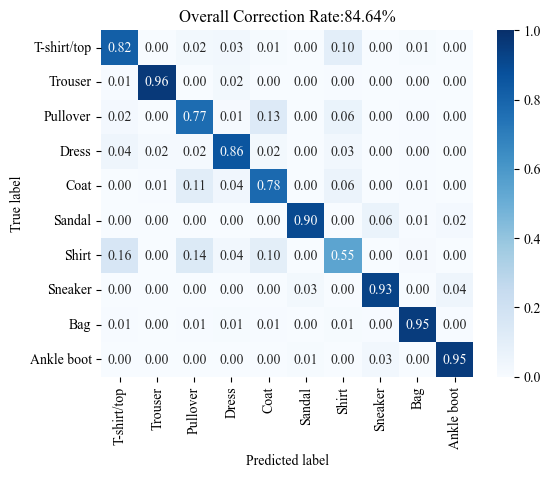

4/5th Epoch:10/10(100.00%) 

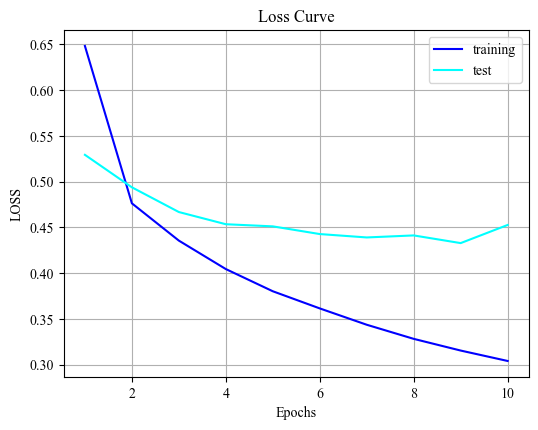

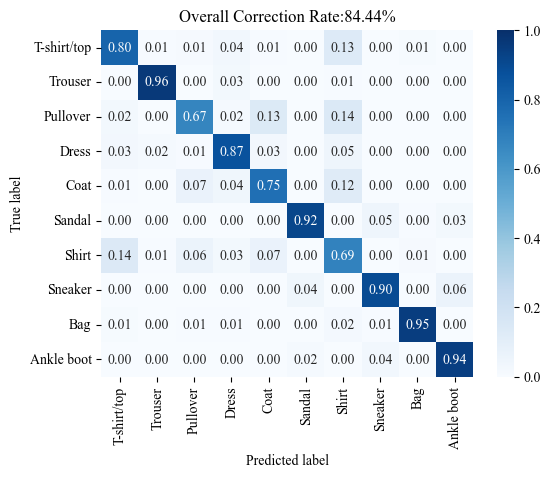

5/5th Epoch:10/10(100.00%) 

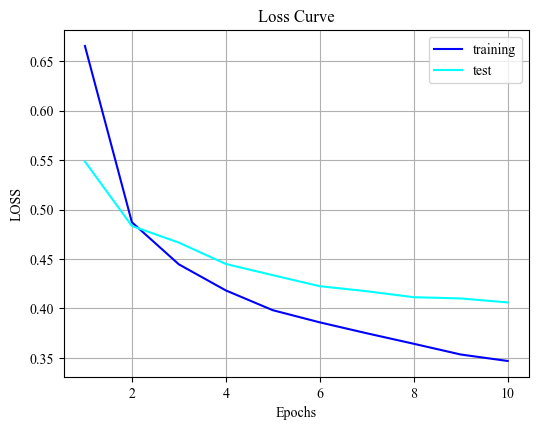

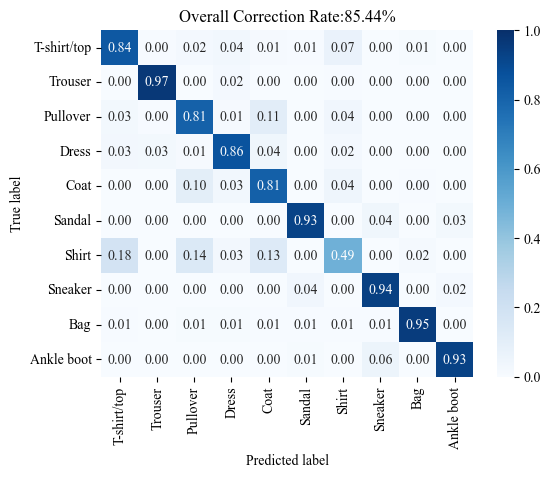

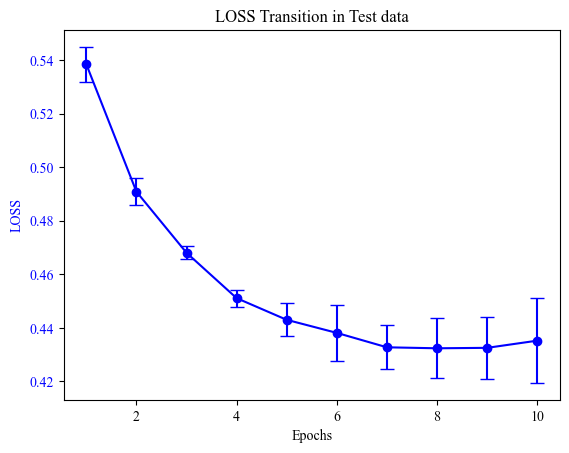

1/5th Epoch:1/10(3.17%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  84.724000        5  85.440000         4  84.440000
1  LOSS   0.435216        5   0.406131         4   0.452743
2  TIME  49.045680        2  47.010895         1  52.575065
----------------------Running with leverage: 8----------------------


1/5th Epoch:10/10(100.00%) 

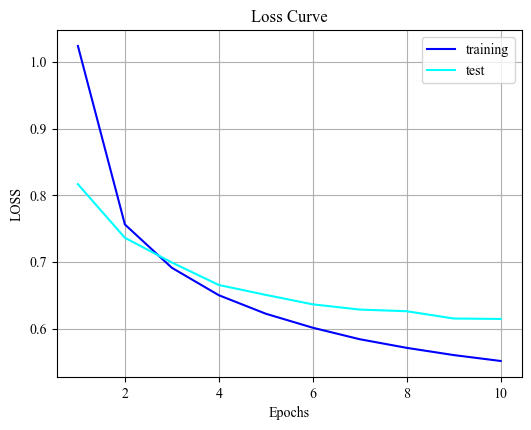

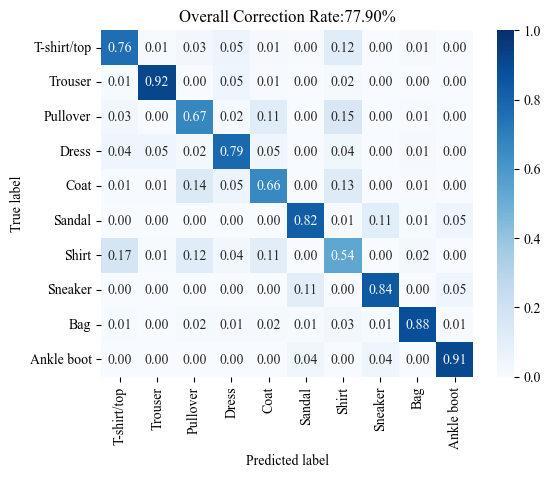

2/5th Epoch:10/10(100.00%) 

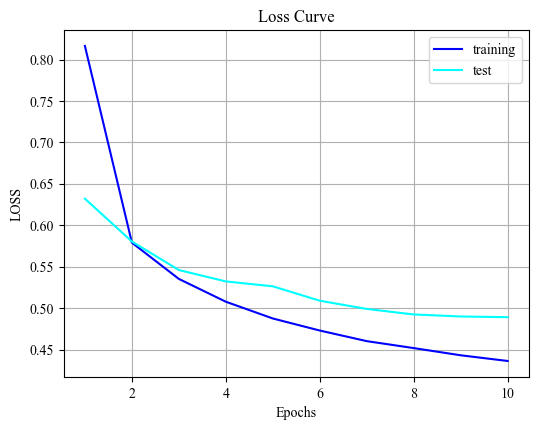

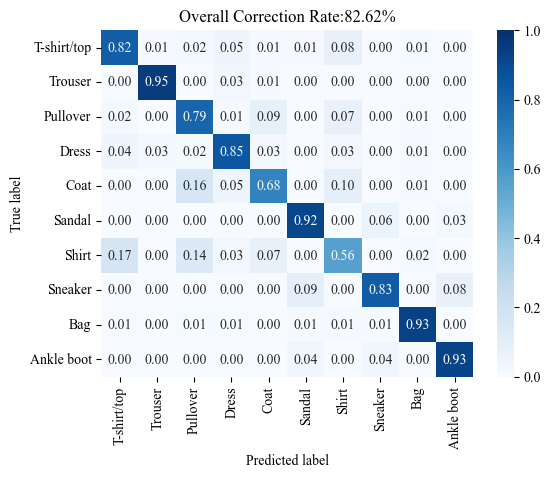

3/5th Epoch:10/10(100.00%) 

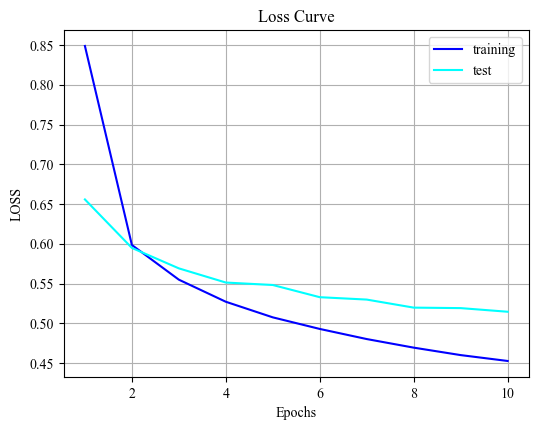

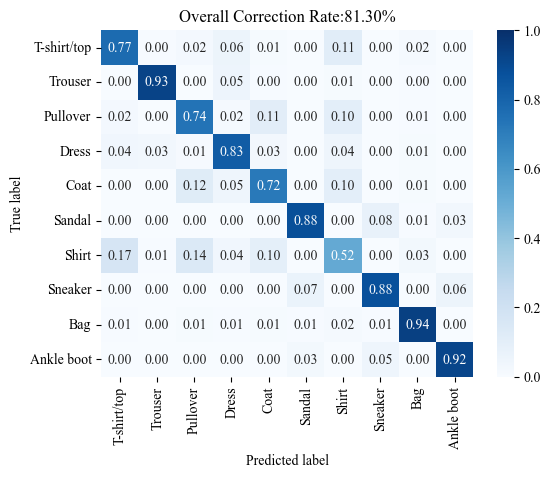

4/5th Epoch:10/10(100.00%) 

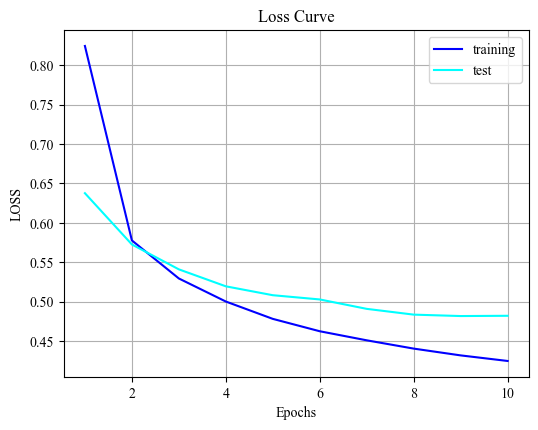

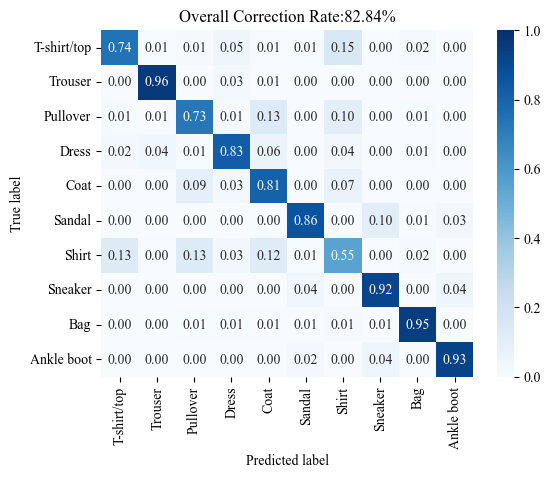

5/5th Epoch:10/10(100.00%) 

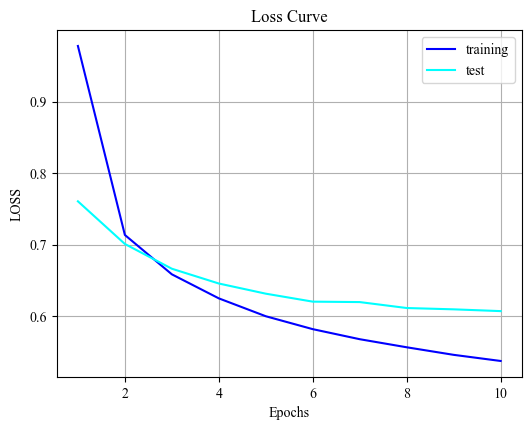

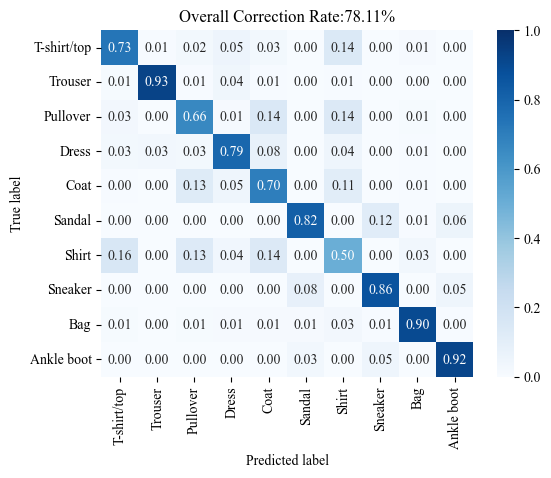

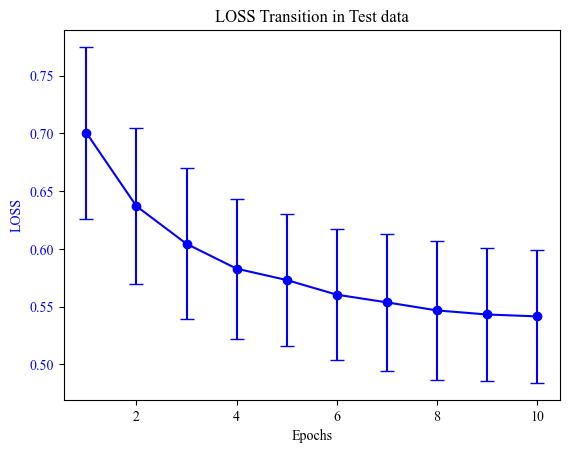

1/5th Epoch:1/10(3.83%) 

           Average  Best ID       Best  Worst ID      Worst
0   ACC  80.554000        4  82.840000         1  77.900000
1  LOSS   0.541467        4   0.482177         1   0.614334
2  TIME  51.188350        1  46.215509         3  57.025012
----------------------Running with leverage: 16----------------------


1/5th Epoch:10/10(100.00%) 

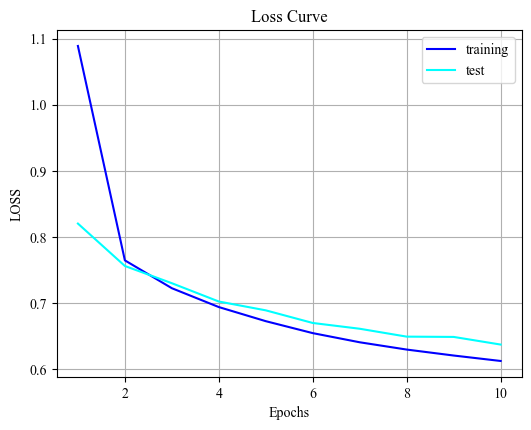

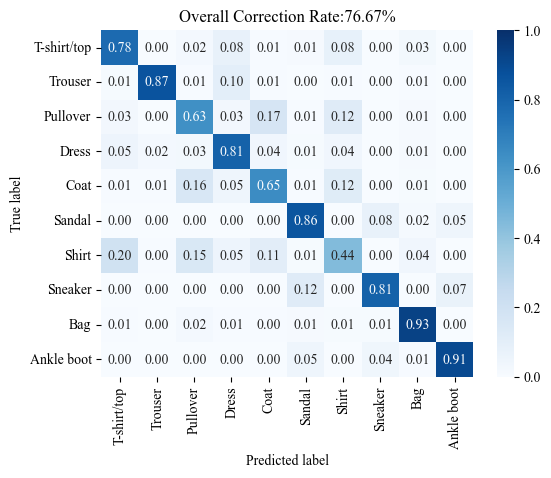

2/5th Epoch:10/10(100.00%) 

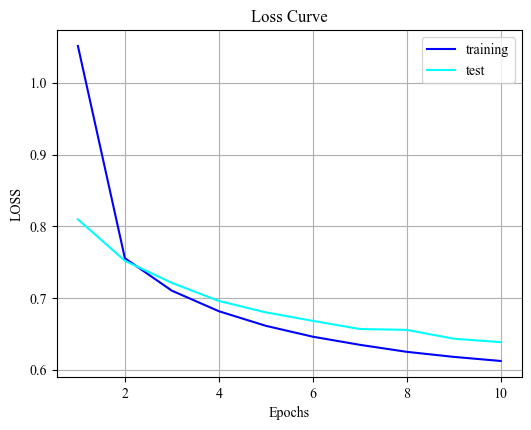

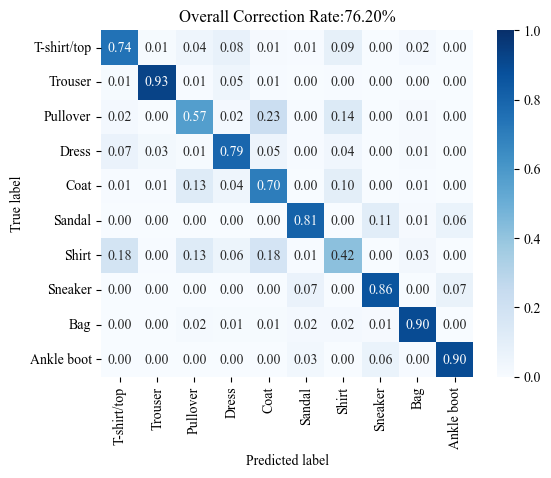

3/5th Epoch:10/10(100.00%) 

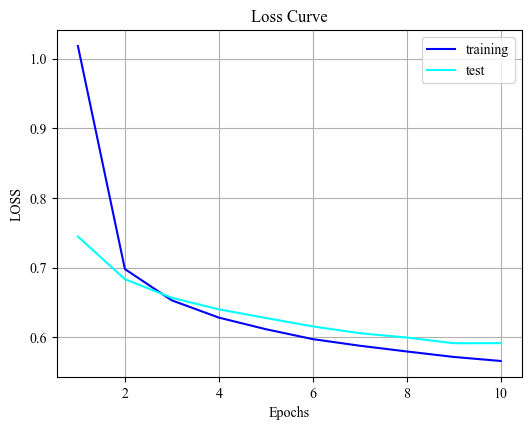

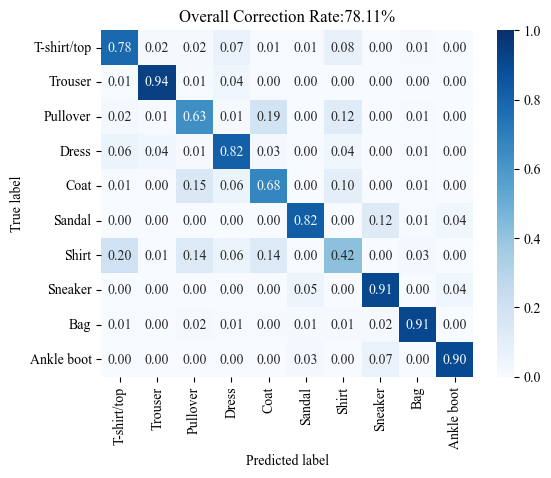

4/5th Epoch:10/10(100.00%) 

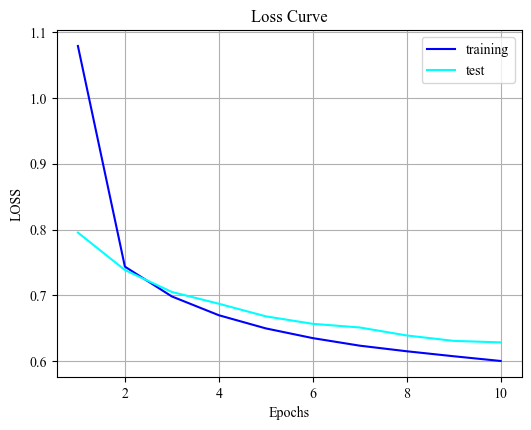

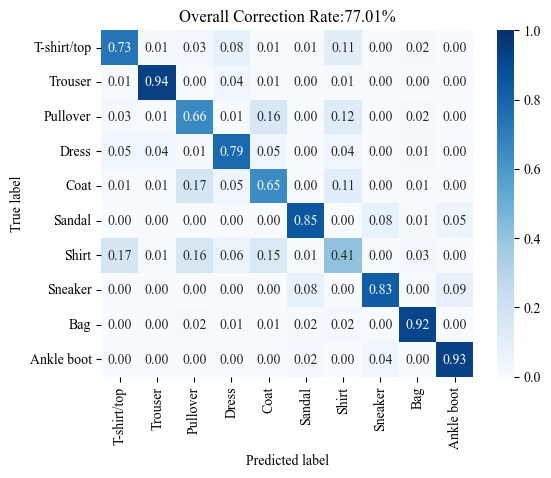

5/5th Epoch:10/10(100.00%) 

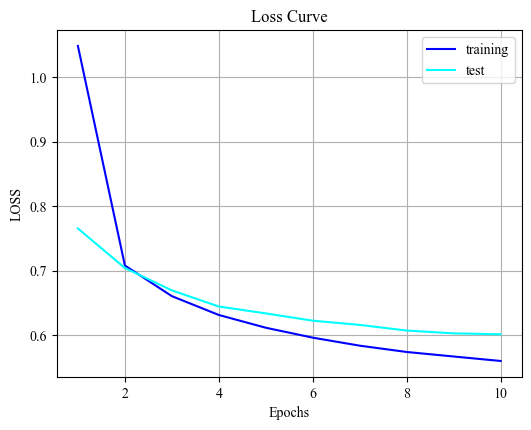

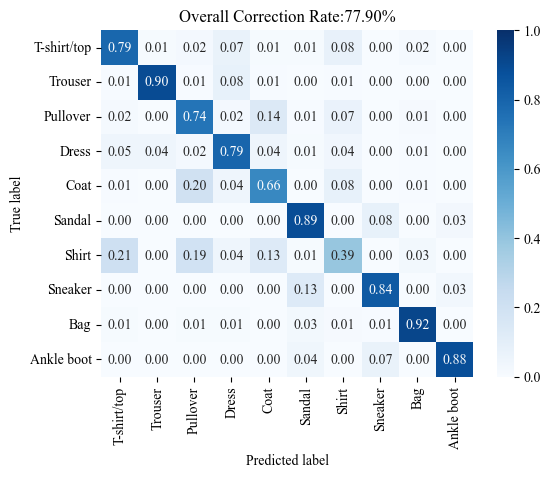

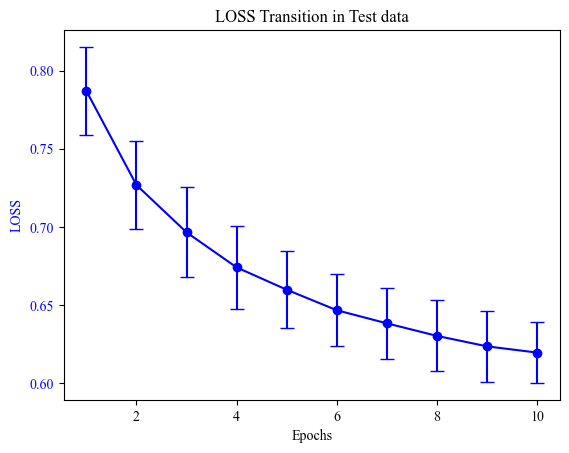

           Average  Best ID       Best  Worst ID      Worst
0   ACC  77.178000        3  78.110000         2  76.200000
1  LOSS   0.619407        3   0.591446         2   0.638590
2  TIME  55.741463        4  52.114979         5  68.758928
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist_VCR
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist_VCR/IM_MLP_6191925.csv


In [12]:

#data---------------------------------------------
dataset = 'fashion-mnist' # 'mnist', 'cifar-10', 'cinic-10' , 'fashion-mnist'
batch_size = 100 #64 MNIST, 100 CIFAR10, 100 CINIC10
#Encoder_Model--------------------------------
enc_type = 'IM' # 'none', 'MZM', 'LI'
cls_type = 'MLP' # 'MLP' or 'CNN'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 5
max_epochs = 10
leverages = [1,2,4,8,16] #enc is not none
kernel_size =4
#save---------------------------------------------
folder = f'Class_{dataset}_VCR'
ex_name= f'{enc_type}_{cls_type}'

data_loaders = {
    'cifar-10': load_CIFAR10_data,
    'cinic-10': load_CINIC10_data,
    'mnist': load_MNIST_data,
    'fashion-mnist':load_Fmnist_data
}

data_train,data_test = data_loaders[dataset]()
if enc_type == 'none':
    leverage = 1

results = []
All_last_LOSSs_ = []
All_last_ACCs_ = []
for leverage in leverages:
    print(f'----------------------Running with leverage: {leverage}----------------------')
    All_last_loss = []
    All_loss_test = []
    All_pro_time = []
    All_test_acc = []
    for num_times in range(num_try):

        loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_nomal(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

        All_loss_test.append(loss_test_)
        All_pro_time.append(sum(pro_time_))
        All_last_loss.append(Last_loss_test)
        All_test_acc.append(Test_acc)

        plot_loss_curve(loss_train_,loss_test_)
        plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

    plot_errorbar_losscurve(All_loss_test)
    create_table(All_test_acc,All_last_loss,All_pro_time)

    All_last_LOSSs_.append(All_last_loss)
    All_last_ACCs_.append(All_test_acc)

save_csv(folder,ex_name,All_last_LOSSs_,All_last_ACCs_)